In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%env BSD500_DATA_DIR=/home/zaccharie/workspace/understanding-unets/
%env BSD68_DATA_DIR=/home/zaccharie/workspace/understanding-unets/

env: BSD500_DATA_DIR=/home/zaccharie/workspace/understanding-unets/
env: BSD68_DATA_DIR=/home/zaccharie/workspace/understanding-unets/


In [3]:
%cd ..
from tdv import TDV
%cd experiments
from data import im_dataset_bsd500
from unrolled_fb import UnrolledFB

/home/zaccharie/workspace/tf-tdv
/home/zaccharie/workspace/tf-tdv/experiments


In [18]:
!pip install tensorflow-addons

  Using cached tensorflow_addons-0.11.2-cp36-cp36m-manylinux2010_x86_64.whl (1.1 MB)
  Using cached typeguard-2.10.0-py3-none-any.whl (16 kB)


In [19]:
%matplotlib nbagg
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_addons as tfa

In [5]:
train_ds = im_dataset_bsd500(batch_size=4)

In [6]:
# model = UnrolledFB(TDV, {}, init_step_size=0.0001, n_iter=5)

In [7]:
# model.compile(loss='mse', optimizer='adam')

In [8]:
%%time
data = next(iter(train_ds))

CPU times: user 85.3 ms, sys: 13.8 ms, total: 99.1 ms
Wall time: 95.8 ms


In [9]:
# model(data[0])

In [10]:
## overfitting
# model.fit(x=data[0][0:1], y=data[1][0:1], epochs=1, batch_size=1)

In [11]:
# Use a checkpoint cback in the future
# model.save_weights('denoising_unrolled_fb_tdv.h5')

In [23]:
sub_model = TDV(n_macro=2, n_scales=2, n_filters=8, pooling='max')
sub_model.compile(loss='mse', optimizer=tfa.optimizers.RectifiedAdam(lr=1e-4))
# print(sub_model(data[0]))
sub_model.fit(x=data[0][0:1], y=data[1][0:1], epochs=1000, batch_size=1)

Epoch 1/1000


StagingError: in user code:

    /home/zaccharie/workspace/tf-tdv/venv/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /home/zaccharie/workspace/tf-tdv/venv/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/zaccharie/workspace/tf-tdv/venv/lib/python3.6/site-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/zaccharie/workspace/tf-tdv/venv/lib/python3.6/site-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/zaccharie/workspace/tf-tdv/venv/lib/python3.6/site-packages/tensorflow/python/distribute/distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/zaccharie/workspace/tf-tdv/venv/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:789 run_step  **
        outputs = model.train_step(data)
    /home/zaccharie/workspace/tf-tdv/venv/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:757 train_step
        self.trainable_variables)
    /home/zaccharie/workspace/tf-tdv/venv/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:2722 _minimize
        gradients = tape.gradient(loss, trainable_variables)
    /home/zaccharie/workspace/tf-tdv/venv/lib/python3.6/site-packages/tensorflow/python/eager/backprop.py:1073 gradient
        unconnected_gradients=unconnected_gradients)
    /home/zaccharie/workspace/tf-tdv/venv/lib/python3.6/site-packages/tensorflow/python/eager/imperative_grad.py:77 imperative_grad
        compat.as_str(unconnected_gradients.value))
    /home/zaccharie/workspace/tf-tdv/venv/lib/python3.6/site-packages/tensorflow/python/eager/backprop.py:151 _gradient_function
        grad_fn = ops._gradient_registry.lookup(op_name)  # pylint: disable=protected-access
    /home/zaccharie/workspace/tf-tdv/venv/lib/python3.6/site-packages/tensorflow/python/framework/registry.py:97 lookup
        "%s registry has no entry for: %s" % (self._name, name))

    LookupError: gradient registry has no entry for: ResizeNearestNeighborGrad


In [20]:
res = sub_model(data[0])

<IPython.core.display.Javascript object>


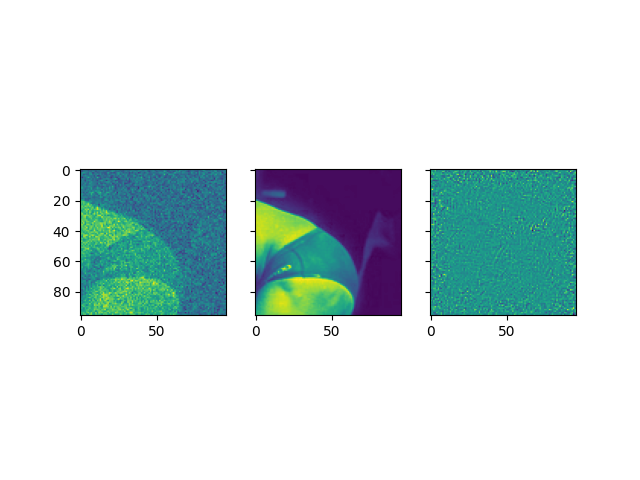

In [21]:
fig, axs = plt.subplots(1, 3, sharex=True, sharey=True)
axs[0].imshow(np.squeeze(data[0][0]))
axs[1].imshow(np.squeeze(data[1][0]))
axs[2].imshow(np.squeeze(res[0]))

In [ ]:
# model.fit(train_ds, epochs=int(1e3//400), steps_per_epoch=400)